In [23]:
import json
import numpy as np
import pandas as pd
import random

# 读取数据

In [24]:
# 读取数据
loc_df = pd.read_csv("Location_Info - 2.csv", encoding='utf_8')
loc_df.head()

,ID,交通设施服务,住宿服务,公司企业,医疗保健服务,商务住宅,生活服务,科教文化服务,类型,购物服务,风景名胜,餐饮服务
0,1,85,94,1147,12,88,426,650,学校,472,0,0
1,2,0,45,1968,74,0,0,330,学校,147,5,43
2,3,165,14,130,23,53,131,511,学校,103,39,86
3,4,66,25,534,0,95,205,461,学校,437,14,128
4,5,255,88,0,43,111,281,437,学校,1679,17,184


In [25]:
# 只选取两个特征：商务住宅&餐饮服务
sub_loc_df = loc_df[["商务住宅", "餐饮服务"]]


<AxesSubplot:xlabel='餐饮服务', ylabel='商务住宅'>

/Users/zhaoluo/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 39184 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zhaoluo/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 39278 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zhaoluo/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26381 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zhaoluo/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zhaoluo/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21830 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zhaoluo/opt/anaconda3/lib/python3.8/site-package

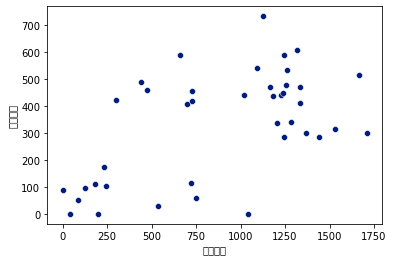

In [26]:
# 所有数据点在商务住宅&餐饮服务进行可视化
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font',family='FangSong') # 此语句确保绘图中的中文可以正常显示
sns.scatterplot(x="餐饮服务", y="商务住宅", data=sub_loc_df)


In [27]:
# 标准化
from sklearn.preprocessing import StandardScaler
km_df = sub_loc_df
km_df_standardize = StandardScaler().fit_transform(km_df)
km_df_standardize = pd.DataFrame(data=km_df_standardize, columns=list(km_df.columns)) 
km_df_standardize.head()

,商务住宅,餐饮服务
0,-1.248985,-1.799001
1,-1.696960,-1.711720
2,-1.427157,-1.624440
3,-1.213351,-1.539188
4,-1.131901,-1.425520


# 初次运行K-Means模型

<AxesSubplot:xlabel='餐饮服务', ylabel='商务住宅'>

/Users/zhaoluo/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 39184 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zhaoluo/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 39278 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zhaoluo/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26381 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zhaoluo/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zhaoluo/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21830 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zhaoluo/opt/anaconda3/lib/python3.8/site-package

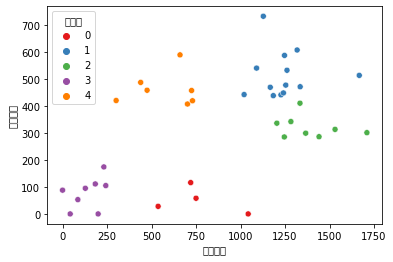

In [28]:
# 导入kmeans包
from sklearn.cluster import KMeans
# 训练k_means模型
km = KMeans(n_clusters=5, random_state=99)
km.fit(km_df_standardize)
# 将新标签组合到原来的数据框里面
km_label = pd.DataFrame(km.labels_, columns=['新标签'])
km_df = pd.concat([km_df, km_label],axis=1)
# 将聚类结果可视化
plt.rcParams['axes.unicode_minus'] = False
sns.set_palette("dark",5)
sns.scatterplot(x="餐饮服务", y="商务住宅", hue="新标签", data=km_df, palette="Set1")


In [19]:
km_df_standardize.head()


,商务住宅,餐饮服务
0,-1.248985,-1.799001
1,-1.696960,-1.711720
2,-1.427157,-1.624440
3,-1.213351,-1.539188
4,-1.131901,-1.425520


<AxesSubplot:xlabel='餐饮服务', ylabel='商务住宅'>

/Users/zhaoluo/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 39184 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zhaoluo/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 39278 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zhaoluo/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26381 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zhaoluo/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zhaoluo/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21830 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zhaoluo/opt/anaconda3/lib/python3.8/site-package

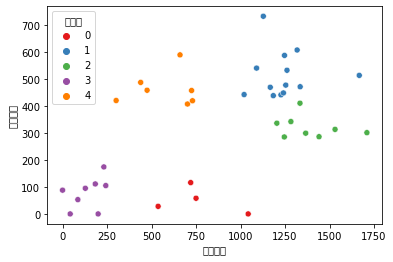

In [20]:
# 将聚类结果可视化
plt.rcParams['axes.unicode_minus'] = False
sns.scatterplot(x="餐饮服务", y="商务住宅", hue="新标签", data=km_df, palette="Set1")


# 标准化和不标准化的区别

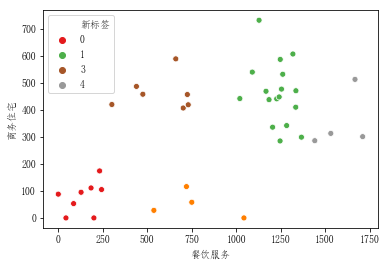

In [172]:
# 下面代码使用没有被标准化的数据训练K-Means模型
# 导入kmeans包
from sklearn.cluster import KMeans
km_df = sub_loc_df
# 训练k_means模型
km = KMeans(n_clusters=5, random_state=99)
km.fit(km_df)
# 将新标签组合到原来的数据框里面
km_label = pd.DataFrame(km.labels_, columns=['新标签'])
km_df = pd.concat([km_df, km_label],axis=1)
# 将聚类结果可视化
plt.rcParams['axes.unicode_minus'] = False
sns.scatterplot(x="餐饮服务", y="商务住宅", hue="新标签", data=km_df, palette="Set1")


# 肘部法则选择聚类个数

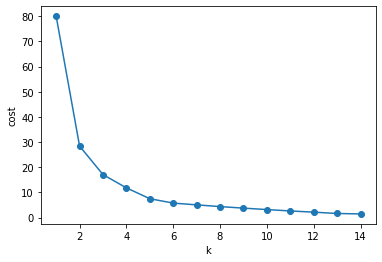

In [21]:
from scipy.spatial.distance import cdist
# 存放每次结果的误差平方和
cost = []
# 尝试不同的聚类个数
K = range(1, 15)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=99)
    kmeanModel.fit(km_df_standardize)
    cost.append(kmeanModel.inertia_) # inertia_是所有点到其所属聚类质心的平方和
# 肘部法则可视化
plt.xlabel('k')
plt.ylabel('cost')
plt.plot(K, cost, 'o-')
plt.show()


# 再次运行K-Means模型

In [10]:
# 导入kmeans包
from sklearn.cluster import KMeans
km_df = sub_loc_df
# 标准化
from sklearn.preprocessing import StandardScaler
km_df_standardize = StandardScaler().fit_transform(km_df)
km_df_standardize = pd.DataFrame(data=km_df_standardize, columns=list(km_df.columns)) 
# 训练k_means模型
km = KMeans(n_clusters=5, random_state=99)
km.fit(km_df_standardize)
# 将新标签组合到原来的数据框里面
km_label = pd.DataFrame(km.labels_, columns=['新标签'])
km_df = pd.concat([km_df, km_label],axis=1)
km_df.head()


,商务住宅,餐饮服务,新标签
0,88,0,1
1,0,43,1
2,53,86,1
3,95,128,1
4,111,184,1


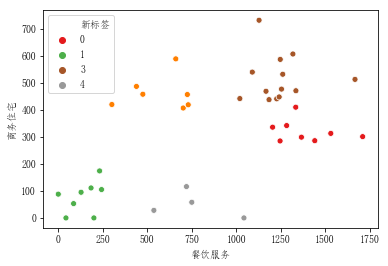

In [187]:
# 将聚类结果可视化
plt.rcParams['axes.unicode_minus'] = False
sns.set_palette("dark",5)
sns.scatterplot(x="餐饮服务", y="商务住宅", hue="新标签", data=km_df, palette="Set1")


# 聚类总结

In [29]:
# final_df作为最后分析用的数据框
final_df = km_df
# KMeans聚类结果增加一列"交通设施服务"
final_df["交通设施服务"] = loc_df["交通设施服务"]
final_df["ID"] = loc_df["ID"]
final_df.head()


,商务住宅,餐饮服务,新标签,交通设施服务,ID
0,88,0,3,85,1
1,0,43,3,0,2
2,53,86,3,165,3
3,95,128,3,66,4
4,111,184,3,255,5


In [30]:
# summary_df用于对聚类的分析，下一步求平均值
summary_df = \
final_df[["商务住宅", "餐饮服务", "交通设施服务", "新标签"]].groupby("新标签") \
        .mean() \
        .round()
#求每一个类别中的数目
summary_df['数目'] = \
    final_df \
    .groupby("新标签") \
    .size()
# 展示
summary_df


,商务住宅,餐饮服务,交通设施服务,数目
新标签,,,,
0,50.0,762.0,276.0,4
1,515.0,1241.0,499.0,13
2,322.0,1389.0,383.0,8
3,78.0,140.0,216.0,8
4,462.0,576.0,265.0,7


In [31]:
# 每个聚类的典型样本 - 基于最大“交通设施服务”
exemplar = \
    final_df \
    .sort_values(['交通设施服务'], ascending = False) \
    .groupby('新标签') \
    .first() \
# 呈现
exemplar


,商务住宅,餐饮服务,交通设施服务,ID
新标签,,,,
0,0,1043,478,20
1,540,1090,815,21
2,286,1441,594,37
3,174,232,619,7
4,419,730,517,17
